#sample test file before staring

##Code to sample  5 essays and calculate cosine similarity

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
train_data_path = '/content/drive/My Drive/data-train.csv'
train_df = pd.read_csv(train_data_path)

In [14]:
# Display the first few rows to verify the data is loaded correctly
print("First few rows of the dataset:")
print(train_df.head())

First few rows of the dataset:
  essay_id                                          full_text  score
0  000d118  Many people have car where they live. The thin...      3
1  000fe60  I am a scientist at NASA that is discussing th...      3
2  001ab80  People always wish they had the same technolog...      4
3  001bdc0  We all heard about Venus, the planet without a...      4
4  002ba53  Dear, State Senator\n\nThis is a letter to arg...      3


In [4]:
essays = train_df['full_text']

In [5]:
vectorizer = CountVectorizer(max_features=10000)
essay_vectors = vectorizer.fit_transform(essays)

In [6]:
similarity_matrix = cosine_similarity(essay_vectors, dense_output=False)

In [7]:
print("Similarity between essay 1 and essay 2:", similarity_matrix[0, 1])

Similarity between essay 1 and essay 2: 0.6186419118997367


### Testing Similarities among 5 essays


In [8]:
print("\nSimilarity Scores for the First 5 Pairs of Essays:")
for i in range(5):
    for j in range(i + 1, 5):
        print(f"Similarity between essay {i + 1} and essay {j + 1}: {similarity_matrix[i, j]}")



Similarity Scores for the First 5 Pairs of Essays:
Similarity between essay 1 and essay 2: 0.6186419118997367
Similarity between essay 1 and essay 3: 0.725936099906097
Similarity between essay 1 and essay 4: 0.6189255108805207
Similarity between essay 1 and essay 5: 0.5546587879740942
Similarity between essay 2 and essay 3: 0.5991532300819219
Similarity between essay 2 and essay 4: 0.5787149617894887
Similarity between essay 2 and essay 5: 0.46947548613549295
Similarity between essay 3 and essay 4: 0.6127284532342641
Similarity between essay 3 and essay 5: 0.60579723517523
Similarity between essay 4 and essay 5: 0.6347598347343313


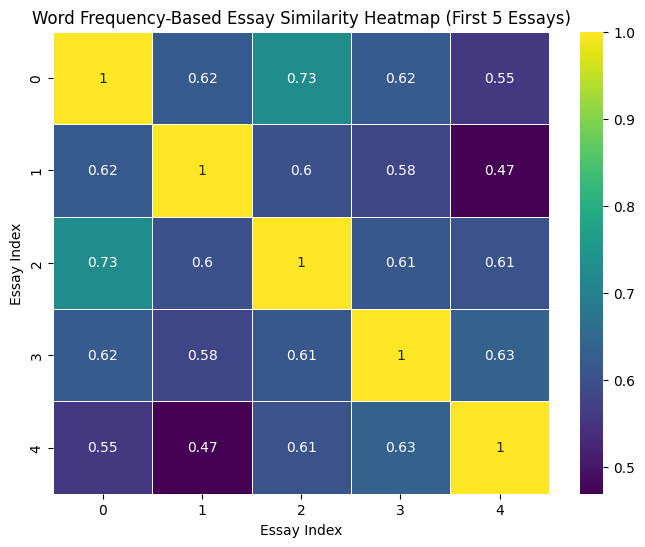

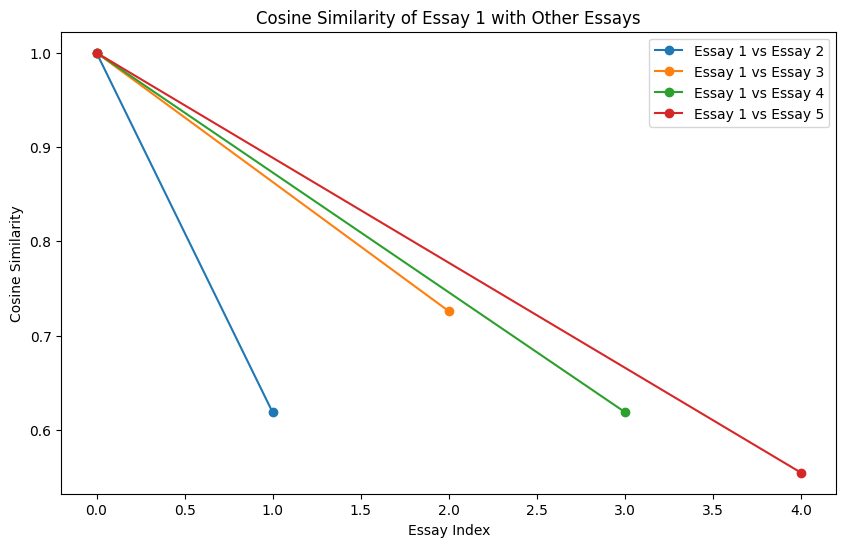

In [16]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the similarity matrix to a dense NumPy array
similarity_array = similarity_matrix.toarray()

# Extract the similarity scores for the first few essays
sample_size = 5  # Number of essays to visualize
similarity_subset = similarity_array[:sample_size, :sample_size]

# Create a heatmap of the sampled cosine similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_subset, annot=True, cmap='viridis', linewidths=0.5)

# Add title and labels
plt.title('Word Frequency-Based Essay Similarity Heatmap (First 5 Essays)')
plt.xlabel('Essay Index')
plt.ylabel('Essay Index')

# Display the heatmap
plt.show()

# Create a line plot for cosine similarity between the first essay and others
plt.figure(figsize=(10, 6))

# Iterate over the first 5 essays to plot their similarity to the first essay
for i in range(1, sample_size):
    plt.plot([0, i], [similarity_subset[0, 0], similarity_subset[0, i]], label=f'Essay 1 vs Essay {i + 1}', marker='o')

# Add title and labels
plt.title('Cosine Similarity of Essay 1 with Other Essays')
plt.xlabel('Essay Index')
plt.ylabel('Cosine Similarity')
plt.legend()

# Display the line plot
plt.show()
